# Introduction

> Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

> The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

> This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

# The Data

In this project, I worked on the following three datasets.

#### 1. Enhanced Twitter Archive

The WeRateDogs Twitter archive had to be downloaded manually from a link provided by Udacity. Once it was downloaded, I read the data into a pandas DataFrame.
> ```python
> dog_archive = pd.read_csv('twitter-archive-enhanced.csv')
> dog_archive.head()
> ```

It contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

#### 2. Additional Data via the Twitter API

There were two notable column emissions from the enhanced twitter archive; retweet count and favourites count.This additional data was to be gathered using the Twitter API. Unfortunately, this method did not work for me so I used the file that was provided by Udacity that had the additional data. After downloading the file, I inspected it using the code below:

```python
# Extract the information we want from the json file
json_tweet_details = []

with open('tweet_json.txt', 'r', encoding='UTF-8') as file:
    for line in file:
        json_text = json.loads(line)
        # Extract the tweet_id, likes and retweet count
        tweet_id = json_text['id_str']
        retweets = json_text['retweet_count']
        likes = json_text['favorite_count']
        # Extract the hashtag from the json file
        hashtags_info = json_text['entities']['hashtags']
        if len(hashtags_info) !=0:
            hashtags = ['#'+item['text'] for item in hashtags_info]
        else:
            hashtags = 'None'
        # Assign these values into our list
        json_tweet_details.append({
            'tweet_id': tweet_id,
            'hashtag': hashtags,
            'retweets': retweets,
            'likes': likes}
        )

# Read all extracted data into a Pandas dataframe
json_tweet_info = pd.DataFrame(json_tweet_details)
json_tweet_info.head(10)
```

#### 3. Image Predictions File

The tweet image prediction data was provided by udacity through a <a href=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" target="_blank">url</a> which we had to download programmatically using the Requests library. Here is how I went about doing it.

 ```python
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file_name = url.split('/')[-1]

response = requests.get(url, stream=True)

# check file
if response.status_code == 200:
    response.raw.decode_content = True
#     open a local file
    with open(file_name, 'wb') as f:
        shutil.copyfileobj(response.raw, f)
        print('successfully downloaded', file_name)
else:
    print('File could not be retrieved')
```

I went ahead and read the data into a dataframe and inspected the first five columns using the code below:

> ```python
> # Read image predictions into a dataframe
> images = pd.read_csv('image-predictions.tsv', sep='\t')
> images.head()
> ```

Below is a summary of the column names and their meanings

> * tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
> - p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
> - p1_conf is how confident the algorithm is in its #1 prediction → 95%
> - p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
> - p2 is the algorithm's second most likely prediction → Labrador retriever
> - p2_conf is how confident the algorithm is in its #2 prediction → 1%
> - p2_dog is whether or not the #2 prediction is a breed of dog → TRUE


# Assessing the data

After gathering all three pieces of data, I assessed them visually and programmatically for quality and tidiness issues. I was required to detect and document at least eight (8) quality issues and two (2) tidiness issues.

## Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

To meet specifications, the following issues must be assessed.

> - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
> - Assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
> - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

### WeRateDogs Archive

**Quality issues**

Low quality data is commonly referred to as dirty data. Dirty data has issues with its content. The Data Quality Dimensions are Completeness, Validity, Accuracy and Consistency. Here are examples of quality issues within our dataset:

* Unusual dog names such as a, an and not in the name column.
* We only want original ratings (no retweets) that have images

**Tidiness issues**

* The various stages of dog life: doggo, pupper, puppo, and floofer should be contained in one column.
* Unwanted columns are present in our data such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
* rating_numerator and rating_denominator can be combined into one column.

### Image Predictions

**Quality issues**

* The prediction in columns p1, p2 and p3 are not uniformly formatted. Some names are lowercase, some are uppercase and some are titlecase.
* The predictions above also have words seperated by underscores instead of spaces.

There were no tidiness issues identified in the image predictions dataset as well as the json tweet information.

### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

**WeRateDogs Archive**

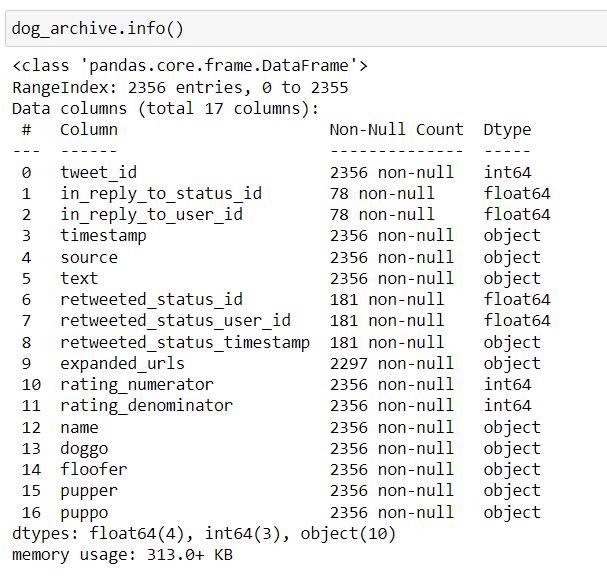

The following was revealed

* tweet_id should be of object(string) data type and not integer since it will not be used in any calculations.
* The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be intergers instead of float
* retweeted_status_timestamp, timestamp columns should be datetime instead of object (string)
* the expanded_urls column has null values.
* There are 181 retweets and 78 replies.

There were no duplicate values in the data.
The source column contained the device used to post the tweets. I made a list of the unique sources used using the folowing code:
```python
# Checking for unique values in the source column
for i, item in enumerate(dog_archive['source'].unique()):
    print(i, ': ', item)
```
There were 4 devices:
* Twitter for iPhone
* Twitter web Client
* Vine - Make a Scene
* TweetDeck

There was a url contained in the `text` column and also the `expanded_urls` column. I checked to see if the link in the text and the expanded_urls column is the same. We will get a sample of each and compare them. I expanded the text column to be able to accommodate the entir text visually.

```python
# expand column width
pd.set_option("display.max_colwidth",150)

dog_archive[['text', 'expanded_urls']].sample(3)
```
I then used `urlexpander` to expand one of the links in the text column to the corresponding link in `expanded_urls` to see if they were identical and realised that both links lead to the same tweet. So I got rid of the `expanded_urls` column later on.

```python
import urlexpander
# url for id 2105
url = 'https://t.co/7JMAHdJ6A4'
expanded = 'https://twitter.com/dog_rates/status/670474236058800128/photo/1'
urlexpander.expand(url) == expanded
```

**Filtering Dog names**

During visual assessment, we identified some unusual dog names like a and an. These names were less than four characters long so we will examine the entire name column for names with less than four characters and analyze the result for more insight. A visual assessment of the results indicates that there are valid dog names with 4 or less characters. However, a closer look reveals that the invalid dog names are all in lowercase while the valid dog names have their first character in uppercase. So we will use this to filter out the valid and invalid names. 109 records had invalid names.

```python
print('Dog names with 4 or less characters...\n')
print(dog_archive.name[dog_archive.name.apply(lambda x: len(x)<=4)].unique())

# Check the entire dataframe for dog names that are in lowercase
dog_names = dog_archive['name'].str.match(r"[A-Z].?")
invalid_names = dog_archive[~dog_names]['name'].value_counts()

print('{} records have invalid names\n'.format(invalid_names.sum()))

print(invalid_names)
```

**Assessing the ratings in the dataset**

I checked the distribution of ratings in the dataset as well as the unique numerators and denominators to determine the highest numerator and the highest denominator to filter out any outliers later. I also realised some ratings that were pulled were actually referring to time such as the tweet with the text `Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer`. It should not be included as a rating

```python
# Examine the unique values in rating numerator and denominator
print('Unique numerators \n')
print(dog_archive['rating_numerator'].unique())
print('\nUnique denominators \n')
print(dog_archive['rating_denominator'].unique())

# Distribution of ratings in the dataset
dog_archive[['rating_numerator', 'rating_denominator']].describe()
```
From the results:

* Most numerators are between 10 and 13 while most denominators are a 10. We will the use this information to check ratings that have a denominator that are not equal to 10 and numerator that is greater than maybe 15
* There are numerators as high as 1776 and denominators as high as 170

**Dog Stages**

For this section, we will count the number of dogs that belong to each of the stages that have been included in the dataset, namely: doggo, floofer, pupper, puppo These columns have also been presented as separate columns which is unnecessary, so they were merged later on into one column.

### Image Predictions

For this dataset, the data type of the tweet_id should be string instead of int. The images dataframe has fewer records than the WeRateDogs archive. 

I found no duplicate records in the datasets. To find out the distribution of predictions in the dataset, I removed the `tweet_id` and `img_num` columns because theyare not meant to be computed. The confidence levels of the remaining columns were between 0 and 1.

```python
# remove tweet_id and img_num columns and compute the rest
cols = set(images.columns) - {'tweet_id', 'img_num'}
new_images = images[list(cols)]
new_images.describe()
```

**Sample Predictions Columns**

Next we will sample each of the prediction columns p1, p2 and p3 to check if they all correspond to dog breeds. We will then retrieve some images of the records that prove otherwise. From the sample I retrieved, not all records correspond to dog breeds. We will isolate and display them to confirm that they are indeed wrong predictions. 
```python
# Check for predictions that were not dog breeds
not_dogs = (~images.p1_dog) & (~images.p2_dog) & (~images.p3_dog)
not_dogs_prediction = images[not_dogs]

print('{} records with no actual dog breeds!\n'.format(not_dogs_prediction.shape[0]))

not_dogs_prediction.head()
```

There were 324 records that had a False value, that is, no dog breed was detected. To confirm this I used the following code to retrieve images that would confirm my findings by sampling at least 5 images

```python
for url in not_dogs_prediction['jpg_url'].sample(5, random_state=10):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)
```

There were false negatives in the output since some of the pictures have dogs but were recorded as having none.

Next, I checked the json tweet info dataset and it had no missing values and the data types of all columns was correct. I then went ahead to find the common column across all 3 datasets using the code below and discovered it was the `tweet_id` column. 

```python
np.intersect1d(np.intersect1d(dog_archive.columns, images.columns),
               json_tweet_info.columns)
```

## Cleaning the Data

So I had to make sure the data type of the column matched across all 3 datasets. To do this, I made a copy of the 3 datasets which I would then use to perform the cleaning steps. After that I dropped records which had a value for the `retweeted_status_id` and `in_reply_to_status_id` columns because we were only interested in original tweets and not retweets or replies to the original tweet. I used the ***define, code, test*** format to document all my cleaning steps.

```python
#  Filter out retweets and replies using a boolean mask
retweet_reply_mask = (dogs_copy.retweeted_status_id.notnull() | 
                      dogs_copy.in_reply_to_status_id.notnull())

dogs_copy = dogs_copy[~retweet_reply_mask]

# Verify the absence of entries for the retweet and reply columns
assert dogs_copy.retweeted_status_id.isnull().all()
assert dogs_copy.in_reply_to_status_id.isnull().all()

print('dogs_copy now has {:,} records.'.format(dogs_copy.shape[0]))
```
I then converted the `tweet_id` column to object/string type and the `timestamp` column to a Pandas datetime object using the `astype()` method.

I used a boolean mask to identify and replaced the unusual dog names with None since they were not actual dog names.
```python
# Create a boolean mask to identify the unusual names
invalid_names_mask = dogs_copy['name'].str.match(r"[a-z].?")
# Identify each unique unusual name from the name column
invalid_names = dogs_copy['name'][invalid_names_mask].unique()
# Replace all unusual names with None
dogs_copy['name'] = dogs_copy['name'].apply(lambda n: 'None' if n in invalid_names else n)

# Verify if there are any improper names still present
assert dogs_copy['name'].str.match(r"[a-z].?").sum() == 0
```
I then dropped the `expanded_urls` column since the urls are already present in the tweet text.

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs. However, we had to:

* Remove the records with the overly high ratings of 420/10 and 1776/10.
* Remove the record with rating of 24/7. This is a date, not an actual rating; the right rating is absent from the text.
* Programmatically extract the right ratings from text to replace the wrong ones.
* Convert high ratings allocated to dog groups to a scale of 10. 

Afterwards, I dropped all the unwanted columns
```python
unwanted_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']
dogs_copy.drop(columns=unwanted_cols, inplace=True)

for col in unwanted_cols:
    assert col not in dogs_copy.columns
```

The text column contains both tweet url and tweet text
Extract the tweet url into a seperate column.
Remove tweet urls from tweet text.

I created a pattern to extract the urls, then extracted them into the `tweet_url` column and accounted for records where tweet text does not contain a url and replaced their values with None in the new `tweet_url` column. Then removed all urls from the `text` column.

```python
# Create a pattern to extract urls
pattern = r"(http.+)"

# Extract urls into a tweet url column
dogs_copy['tweet_url'] = dogs_copy['text'].str.extract(pattern)

# Account for records where tweet text does not contain a url
dogs_copy['tweet_url'].fillna('None', inplace = True)

# Remove urls from the text column
dogs_copy['text'] = dogs_copy['text'].str.replace(pattern, '', regex=True)
```
Here is a sample of the output.

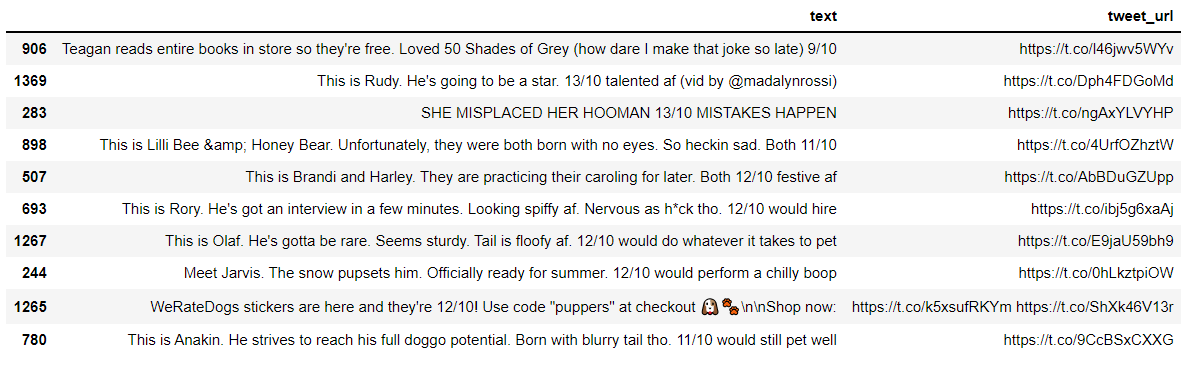

Extract device information from source column and remove accompanying tags.

Convert all ratings to a denominator scale of 10 using the expression: rating=(ratingnumerator/ratingdenominator)×10. With this expression, a rating of 120/100 becomes 12/10 and a rating of 55/60 becomes 9.16/10.
Once the ratings are standardized, reduce ratings to a single column called rating.
Drop the rating_numerator and rating_denominator columns.

```python
# Use the expression to calculate a single rating value
rating = 10 * (dogs_copy['rating_numerator'].astype(float) / dogs_copy['rating_denominator'].astype(float))

# Allocate the values into a new column in archive_clean
dogs_copy['rating'] = rating

# Drop the rating numerator and denominator columns
dogs_copy.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

# verify the removal of the dropped columns
for col in 'rating_numerator', 'rating_denominator':
    assert col not in dogs_copy.columns

# Check how standardized ratings are now distributed in the dataframe
dogs_copy.rating.describe().to_frame()
```

The 4 dog stages have been put in separate columns

Check and correct any conflicting dog stages, if present and store all the dog stages in a single column called stage.
Drop the columns doggo, pupper, puppo, and floofer and set the stage column to a categorical type.

```python
# Isolate the dog stage columns into a dataframe
dog_stages = dogs_copy[['doggo', 'pupper', 'puppo', 'floofer']]

# Check for multiple stages

stage = dog_stages.sum(axis=1)
stage.value_counts()
```

There are several records present with multiple dog stages put together and most of them have the text None before and after making it difficult to read. We will trim the extra None characters except for records where the string is made up of only Nones. Doggo appears several times and is mixed with other dog breeds. We'll examine the specific records to make sure this was not recorded erroneously.

```python
# Assign the dog stages into a column in the dogs_copy dataframe
dogs_copy['stage'] = stage

# Identify and isolate records where dogs were assigned multiple stages
multiple_stages = ['doggopupper', 'doggopuppo', 'doggofloofer']
multiple_stage_mask = dogs_copy.stage.apply(lambda x: x in multiple_stages)

# Examine these occurences
dogs_copy[multiple_stage_mask][['tweet_id', 'tweet_url', 'text', 'stage']]
```

Upon examining the tweet ids, the text and checking the tweet urls, we obeserve the following:

* Some stages have been pulled together because both of them were mentioned in the text but only one is the correct dog stage. Example tweet_id 855851453814013952.
* Tweets with id: 808106460588765185, 781308096455073793, 759793422261743616, 741067306818797568, and 733109485275860992 are actually about two dogs, a doggo and a pupper, hence the doggopupper classification.
* Tweet id 785639753186217984 is actually a hedgehog so we will remove the record.
* A few of the stages were categorised wrongly. Below are the correct stages:
> * 855851453814013952 - puppo
> * 854010172552949760 - floofer.
> * 817777686764523521 - pupper.
> * 801115127852503040 - pupper.
> * 751583847268179968 - doggo

The final dataset had 2093 records with no null values.

### Image predictions

The different predictions (p1, p2, p3) and their respective confidence level (p1_conf, p2_conf, p3_conf) columns can be reduced into two columns to contain prediction and confidence variables. Iterate through each row of predictions_copy and extract the best prediction and confidence values. Assign these values into new columns named breed and confidence.
p1_dog, p2_dog and p3_dog columns can be used to select the appropriate predictions to be used.

```python
# Create a list to store the best prediction and confidence values
prediction_list = []

# Define a function to perform the extraction process
def extract_breed_info(row):
    """
        Extracts the best prediction and confidence value from passed row.
        Params:
            row: a row from the dataframe of interest.
        Output:
            A dictionary containing prediction and confidence appended into prediction list.
            Prints a status update of extraction process.
    """
    if row.p1_dog:
        prediction_list.append({'breed': row.p1,'confidence': row.p1_conf})
    elif row.p2_dog:
        prediction_list.append({'breed': row.p2,'confidence': row.p2_conf})
    elif row.p3_dog:
        prediction_list.append({'breed': row.p3,'confidence': row.p3_conf})
    else:
        prediction_list.append({'breed': 'Unknown','confidence': 0})
        
    return 'Extracted to prediction list'

# Run the extraction process
predictions_copy.apply(extract_breed_info, axis=1)

# Assign the values in prediction list into new columns in predictions_copy
predictions_copy[['breed', 'confidence']] = pd.DataFrame(prediction_list)

# Round confidence to three decimal places
predictions_copy.confidence = round(predictions_copy.confidence, 3)
```
I then removed the `img_num` column and dropped all unwanted columns and went on to convert tweet_id column to string/object type using the `astype()` method.

Format the prediction column entries to title case and replace underscores with spaces
```python
# Replace underscores with space
predictions_copy.breed = predictions_copy.breed.str.replace('_', ' ').str.title()
```

### JSON Data

Hashtags have been stored as lists instead of strings. We will change this using the explode method and get unique values

```python
json_copy = json_copy.explode('hashtag')
```

### Create a Master Dataset

We will merge all the three datasets using the `tweet_id` column as it is common in all three datasets as seen earlier. We will check to make sure the data type of tweet_id is the same in all 3 data sets to avoid merge conflicts and change where necessary. I then reordered the columns and renamed some of the columns so that they could be more descriptive.
The resulting dataframe had 14 columns and was saved as `twitter_archive_master.csv`

```python
# reset dataframe indices for json dataframe and predictions dataframe
json_copy = json_copy.reset_index(drop=True)
predictions_copy = predictions_copy.reset_index(drop=True)

# Merge dogs_copy and predictions_copy into master df
master_df = pd.merge(dogs_copy, predictions_copy, on='tweet_id', how='inner')

# Merge json_copy into master df
master_df = pd.merge(master_df, json_copy, on='tweet_id', how='inner')

master_df.info()

# Reorder the columns
column_order = ['tweet_id', 'timestamp', 'name', 'breed', 'confidence', 'stage', 'rating',
                'hashtag', 'retweets', 'likes', 'jpg_url', 'tweet_url', 'text']
master_df = master_df[column_order]

# Give columns descriptive names
master_df.rename(
    columns={
        'name': 'dog_name',
        'breed': 'dog_breed',
        'stage': 'dog_stage',
        'jpg_url': 'image'
    }, inplace=True)
```

## Store Data

```python
master_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')
```